In [ ]:
import numpy as np
import pandas as pd
import os
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive

# have to connect to my data files that stored in my google drive
drive.mount('/content/drive')


Mounted at /content/drive


Data Collection

In [ ]:
# Reading data stored in csv formats
yield_data = pd.read_csv('/content/drive/My Drive/DsProject/yield.csv')
temp_data = pd.read_csv('/content/drive/My Drive/DsProject/temp.csv')
rainfall_data = pd.read_csv('/content/drive/My Drive/DsProject/rainfall.csv')
pesticides_data = pd.read_csv('/content/drive/My Drive/DsProject/pesticides.csv')
yield_df = pd.read_csv('/content/drive/My Drive/DsProject/yield_df.csv')


Data Preprocessing

In [ ]:
yield_data.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
needed = ['Area','Item','Year','Value']
yield_data = yield_data[needed]

In [ ]:
temp_data.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_data.head(5)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
rainfall_data.head(5)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
pesticides_data.head(5)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
needed = ['Area','Year','Value']
pesticides_data = pesticides_data[needed]

In [ ]:
temp_data= temp_data[temp_data.Year >= 1961]
yield_final = pd.merge(yield_data,temp_data,on=['Year','Area'])
yield_final = pd.merge(yield_final,pesticides_data,on=['Year','Area'])
yield_final.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace = True)
yield_final = pd.merge(yield_final,rainfall_data,on=['Year','Area'])
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

In [ ]:
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

In [ ]:
yield_final=yield_final.dropna()
yield_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              28242 non-null  object 
 1   Item              28242 non-null  object 
 2   Year              28242 non-null  int64  
 3   Yield_Value       28242 non-null  int64  
 4   avg_temp          28242 non-null  float64
 5   Pesticides_Value  28242 non-null  float64
 6   average_rain      28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
yield_final = yield_final[['Area','Item','Year','avg_temp','Pesticides_Value','average_rain','Yield_Value']]
yield_final

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.00,1485.0,36613
1,Albania,Potatoes,1990,16.37,121.00,1485.0,66667
2,Albania,"Rice, paddy",1990,16.37,121.00,1485.0,23333
3,Albania,Sorghum,1990,16.37,121.00,1485.0,12500
4,Albania,Soybeans,1990,16.37,121.00,1485.0,7000
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,19.76,2550.07,657.0,22581
28244,Zimbabwe,Sorghum,2013,19.76,2550.07,657.0,3066
28245,Zimbabwe,Soybeans,2013,19.76,2550.07,657.0,13142
28246,Zimbabwe,Sweet potatoes,2013,19.76,2550.07,657.0,22222


In [ ]:
yield_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              28242 non-null  object 
 1   Item              28242 non-null  object 
 2   Year              28242 non-null  int64  
 3   avg_temp          28242 non-null  float64
 4   Pesticides_Value  28242 non-null  float64
 5   average_rain      28242 non-null  float64
 6   Yield_Value       28242 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


Data Visualization

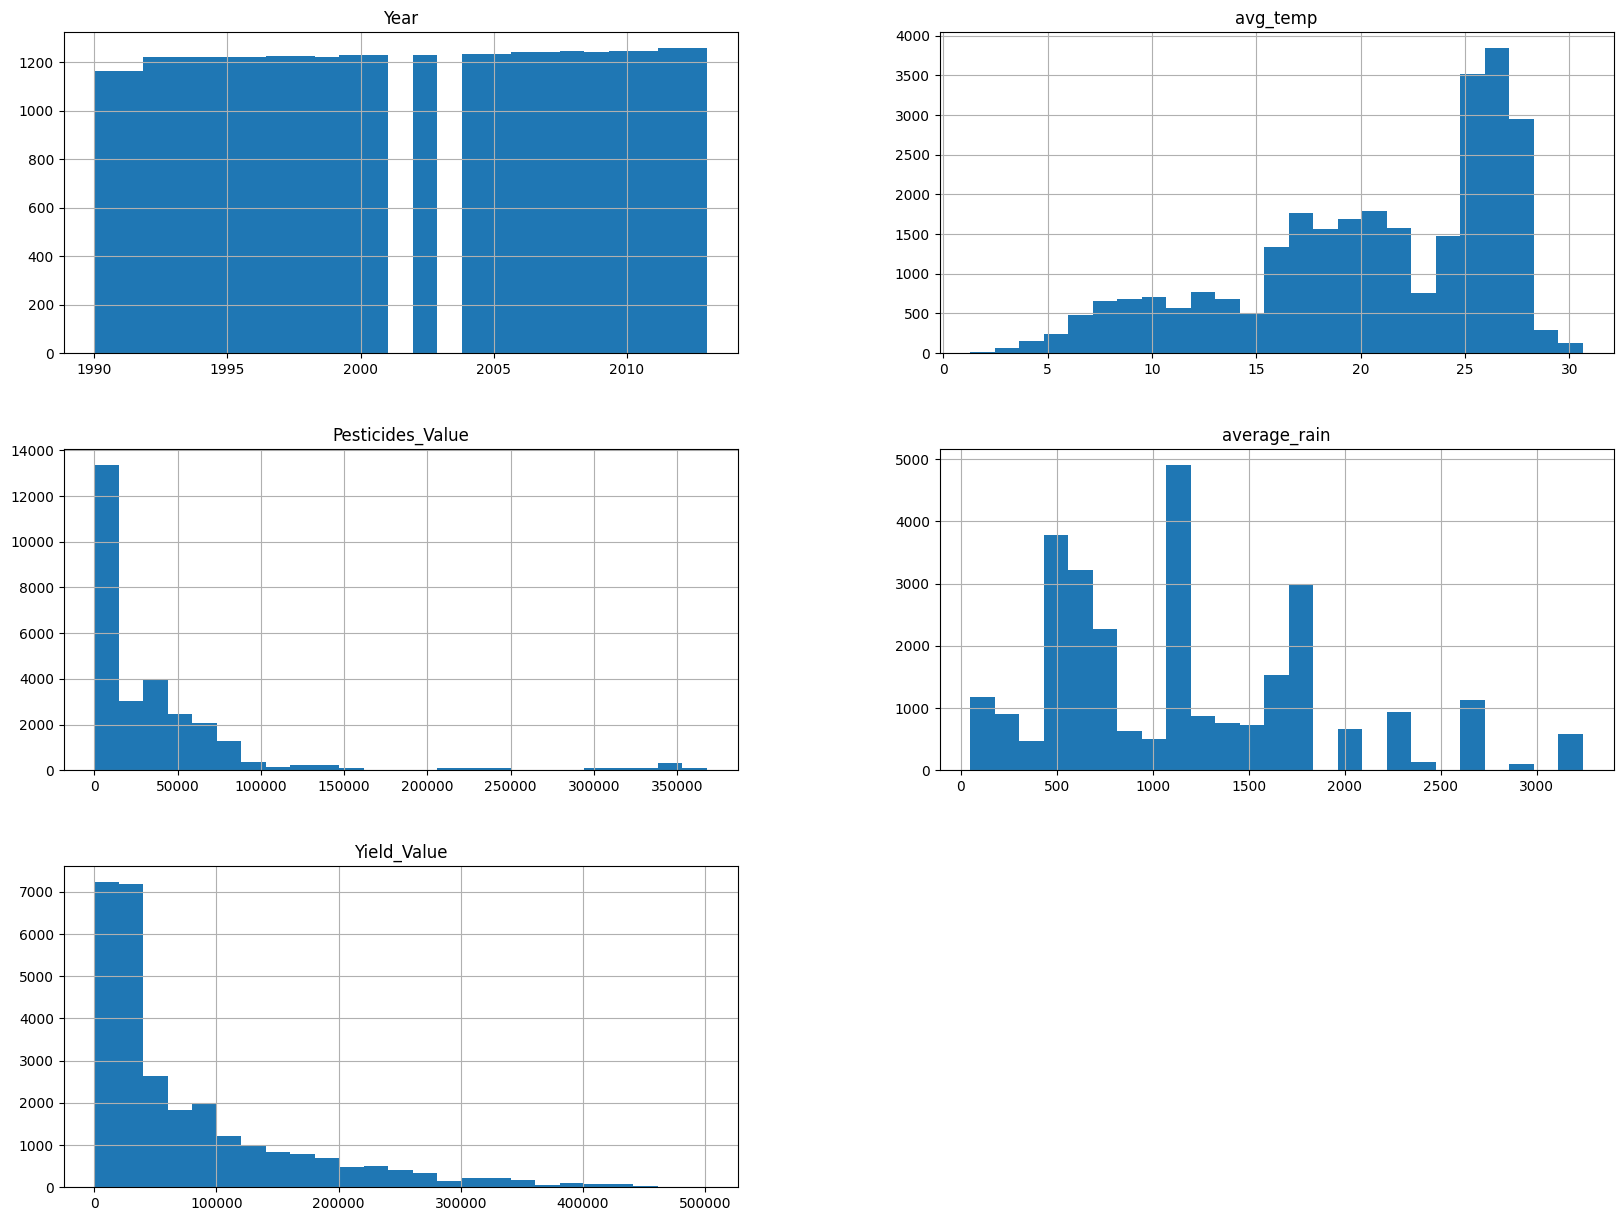

In [ ]:
yield_final.hist(bins = 25,figsize=(20,15));

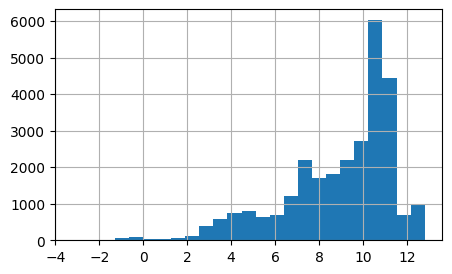

In [ ]:
yield_final['Pesticides_log']= np.log(yield_final['Pesticides_Value'])
yield_final['Pesticides_log'].hist(bins = 25,figsize=(5,3));

In [ ]:
yield_final['rain_temp']= yield_final['avg_temp'] * yield_final['average_rain']
yield_final['Pesticides_rain']= np.log(yield_final['Pesticides_Value'] / yield_final['average_rain'])
yield_final['Pesticides_temp']= np.log(yield_final['Pesticides_Value'] / yield_final['avg_temp'])
yield_final['Pesticides_temp_rain']= (yield_final['Pesticides_temp'] / yield_final['Pesticides_rain'])
yield_final['rain_log']= np.log(yield_final['avg_temp'])
yield_final['temp_rainlog']=yield_final['avg_temp'] /  yield_final['rain_log']
num_cols=['avg_temp', 'Pesticides_Value', 'average_rain','rain_temp','Pesticides_rain','Pesticides_temp','Pesticides_temp_rain','Pesticides_log','rain_log','temp_rainlog','Yield_Value']
corr_matrix = yield_final[num_cols].corr()
corr_matrix["Yield_Value"].sort_values(ascending=False)

Yield_Value             1.000000
Pesticides_temp         0.159088
Pesticides_log          0.146724
Pesticides_rain         0.143231
Pesticides_Value        0.064085
average_rain            0.000962
Pesticides_temp_rain    0.000648
rain_temp              -0.044928
rain_log               -0.107887
avg_temp               -0.114777
temp_rainlog           -0.115474
Name: Yield_Value, dtype: float64

In [ ]:
datacorr=yield_final.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])
datacorr

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log,rain_temp,Pesticides_rain,Pesticides_temp,Pesticides_temp_rain,rain_log,temp_rainlog
0,0,1,1990,16.37,121.00,1485.0,36613,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.79545,5.855944
1,0,3,1990,16.37,121.00,1485.0,66667,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.79545,5.855944
2,0,4,1990,16.37,121.00,1485.0,23333,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.79545,5.855944
3,0,5,1990,16.37,121.00,1485.0,12500,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.79545,5.855944
4,0,6,1990,16.37,121.00,1485.0,7000,4.795791,24309.45,-2.507380,2.000340,-0.797781,2.79545,5.855944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,100,4,2013,19.76,2550.07,657.0,22581,7.843876,12982.32,1.356192,4.860216,3.583723,2.98366,6.622739
28244,100,5,2013,19.76,2550.07,657.0,3066,7.843876,12982.32,1.356192,4.860216,3.583723,2.98366,6.622739
28245,100,6,2013,19.76,2550.07,657.0,13142,7.843876,12982.32,1.356192,4.860216,3.583723,2.98366,6.622739
28246,100,7,2013,19.76,2550.07,657.0,22222,7.843876,12982.32,1.356192,4.860216,3.583723,2.98366,6.622739


<Axes: >

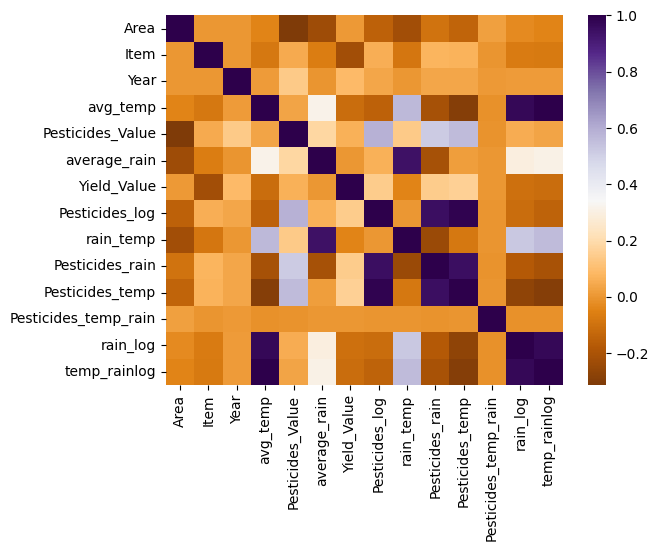

In [ ]:
sns.heatmap(datacorr.corr() , cmap='PuOr')

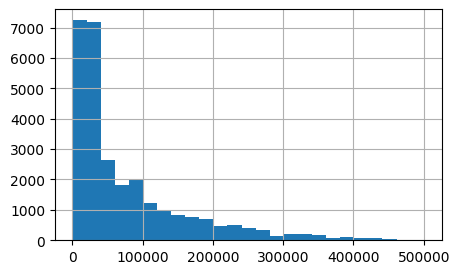

In [ ]:
datacorr['Yield_Value'].hist(bins = 25 , figsize=(5,3));

In [ ]:
datacorr["Yield_Value_Cat"] = pd.cut(datacorr["Yield_Value"],
 bins=[0.,30000, 100000,250000, 350000.,np.inf],
 labels=[1, 2, 3, 4, 5])

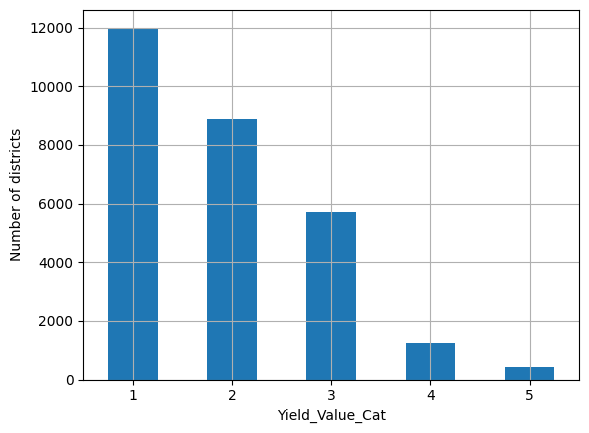

In [ ]:
datacorr["Yield_Value_Cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Yield_Value_Cat")
plt.ylabel("Number of districts")
plt.show()

Data splitting & training

In [ ]:
strat_train_set, strat_test_set = train_test_split(
datacorr, test_size=0.1, stratify=datacorr["Yield_Value_Cat"],random_state=1812)

In [ ]:
strat_test_set["Yield_Value_Cat"].value_counts()/len(strat_test_set)

1    0.425133
2    0.314690
3    0.201770
4    0.043894
5    0.014513
Name: Yield_Value_Cat, dtype: float64

In [ ]:
train_set, test_set = train_test_split(datacorr, test_size=0.1,random_state=1812)

In [ ]:
test_set["Yield_Value_Cat"].value_counts()/len(test_set)

1    0.436814
2    0.304425
3    0.197876
4    0.044602
5    0.016283
Name: Yield_Value_Cat, dtype: float64

In [ ]:
datacorr["Yield_Value_Cat"].value_counts()/len(datacorr)

1    0.424899
2    0.314744
3    0.201756
4    0.044012
5    0.014588
Name: Yield_Value_Cat, dtype: float64

In [ ]:
X = datacorr.drop("Yield_Value", axis=1)
Y = datacorr["Yield_Value"].copy()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.1, stratify=datacorr["Yield_Value_Cat"],random_state=1812)

In [ ]:
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)

In [ ]:
X_test_sc = std_scaler.transform(X_test)

Training models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

The accuracy of the Linear Regression Model Train is 85.74
The accuracy of the  Linear Regression Model Test is 86.11


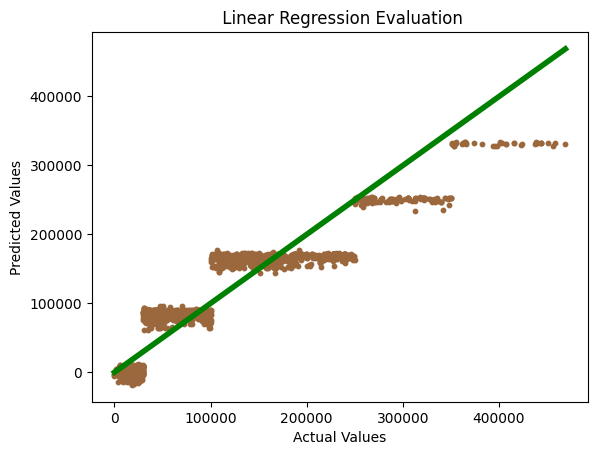

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.861125,990314802.367324,0.861125


In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression())]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

The accuracy of the Random Forest Model Train is 99.90
The accuracy of the  Random Forest Model Test is 99.17


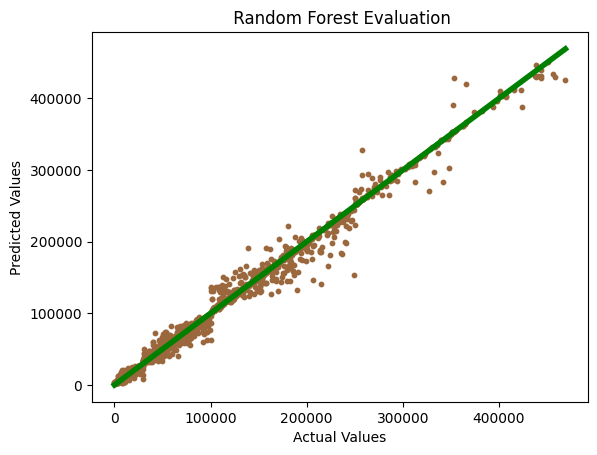

,Model,Accuracy,MSE,R2_score
0,Random Forest,0.991668,59413144.709103,0.991668


In [ ]:
results = []

models = [
    ('Random Forest', RandomForestRegressor(random_state=1812))]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

The accuracy of the XGBoost Model Train is 99.41
The accuracy of the  XGBoost Model Test is 98.78


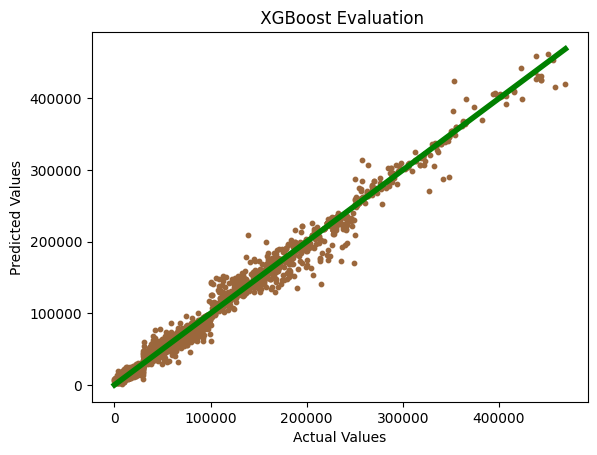

,Model,Accuracy,MSE,R2_score
0,XGBoost,0.987839,86717970.669664,0.987839


In [ ]:
results = []

models = [
    ('XGBoost', XGBRegressor(random_state=1812))]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

The accuracy of the KNN Model Train is 99.08
The accuracy of the  KNN Model Test is 98.29


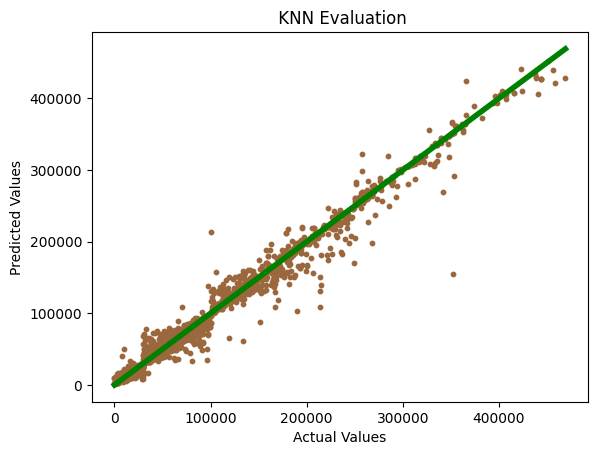

,Model,Accuracy,MSE,R2_score
0,KNN,0.982902,121925478.285749,0.982902


In [ ]:
results = []

models = [
    ('KNN',KNeighborsRegressor(n_neighbors=5))]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

To find out which model is the best based on the success metrics

In [ ]:
print(dff)

  Model  Accuracy           MSE  R2_score
0   KNN  0.982902  1.219255e+08  0.982902


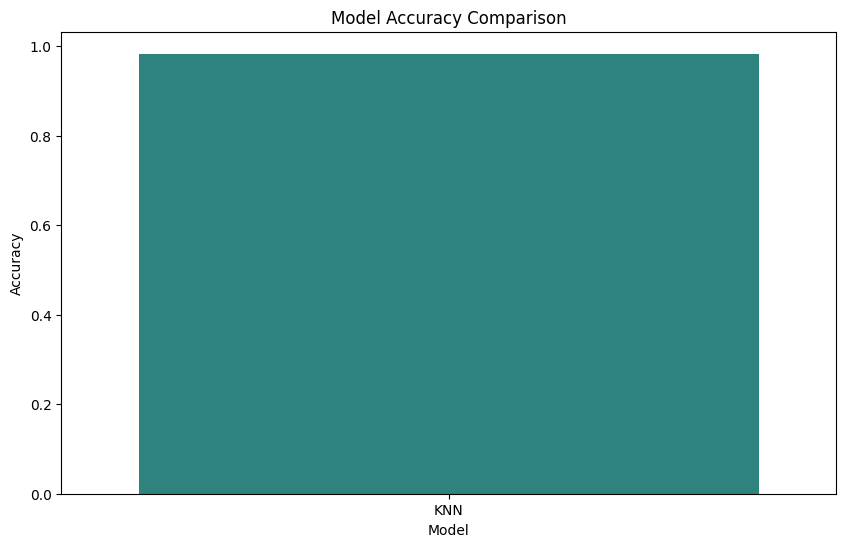

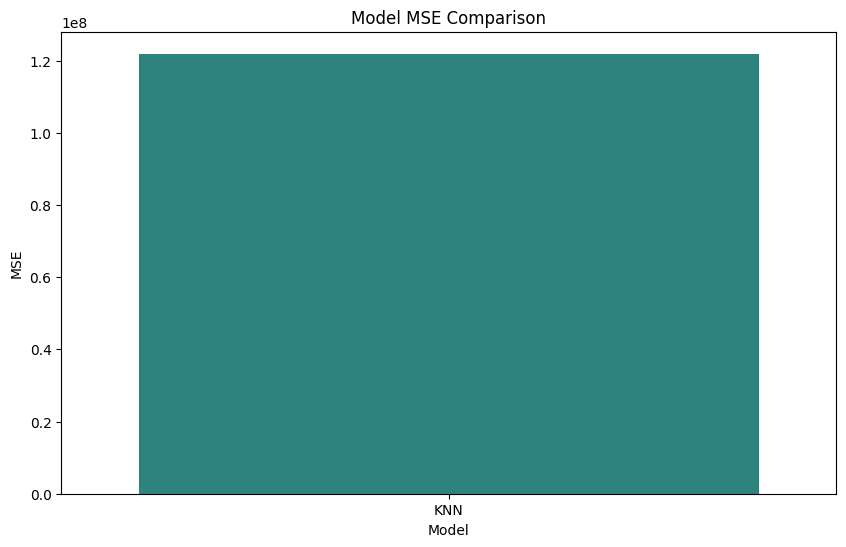

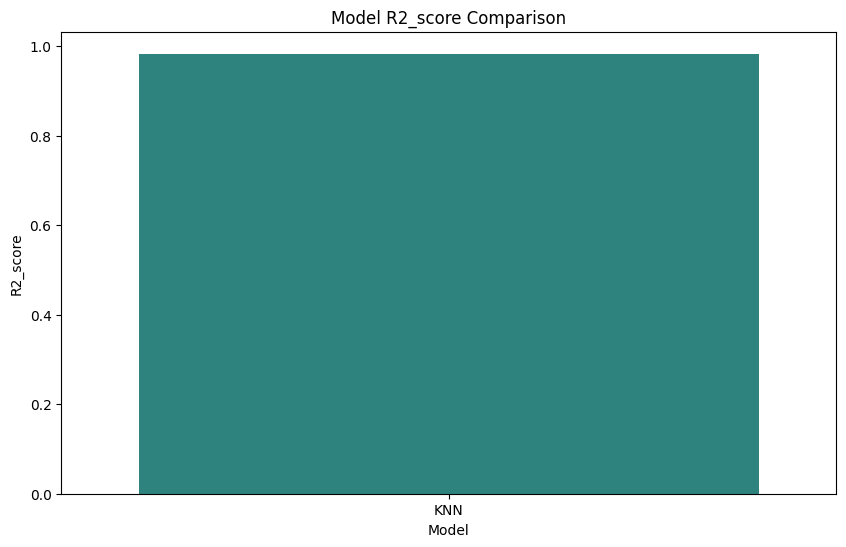

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=dff, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()

# Bar plot for MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=dff, palette='viridis')
plt.title('Model MSE Comparison')
plt.show()

# Bar plot for R2_score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_score', data=dff, palette='viridis')
plt.title('Model R2_score Comparison')
plt.show()


In [ ]:
df_styled_best = (
    dff.style
    .highlight_max(subset=['Accuracy', 'R2_score'], color='green')
    .highlight_min(subset=['MSE'], color='green')
    .highlight_max(subset=['MSE'], color='red')
    .highlight_min(subset=['Accuracy', 'R2_score'], color='red')
)
display(df_styled_best)


,Model,Accuracy,MSE,R2_score
0,KNN,0.982902,121925478.285749,0.982902
